In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
import torch

In [2]:
filename = "../input/netcdf/EastSea_Zcoord_0002_depth_001m.nc"
data = xr.open_dataset(filename) 
data

<xarray.Dataset> Size: 13MB
Dimensions:  (eta_rho: 322, xi_rho: 706, ocean_time: 1)
Dimensions without coordinates: eta_rho, xi_rho, ocean_time
Data variables:
    lon      (eta_rho, xi_rho) float64 2MB ...
    lat      (eta_rho, xi_rho) float64 2MB ...
    mask     (eta_rho, xi_rho) float64 2MB ...
    u        (ocean_time, eta_rho, xi_rho) float64 2MB ...
    v        (ocean_time, eta_rho, xi_rho) float64 2MB ...
    temp     (ocean_time, eta_rho, xi_rho) float64 2MB ...
    salt     (ocean_time, eta_rho, xi_rho) float64 2MB ...
Attributes:
    Convention:  CF-1.0

In [3]:
temp_tensor = torch.tensor(data['temp'].values)
temp_tensor.shape

torch.Size([1, 322, 706])

In [4]:
norm_tensor = torch.nan_to_num(temp_tensor, nan=0)
print(norm_tensor.shape)
norm_tensor = norm_tensor.permute(1, 2, 0)
print(norm_tensor.shape)

torch.Size([1, 322, 706])
torch.Size([322, 706, 1])


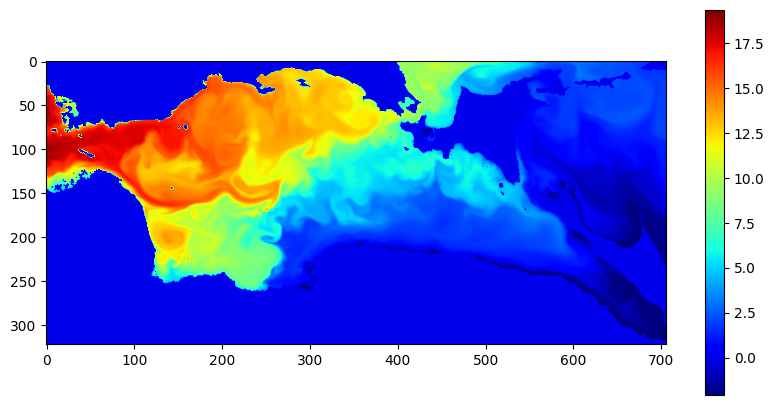

In [5]:
plt.figure(figsize=(10,5))
plt.imshow(norm_tensor, cmap='jet')  # Or Use viridis, hot, cool, grey colormaps for visualization
plt.colorbar()  # Add colorbar for reference
plt.show()